In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_pd = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_pd = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
#use filename.columns to see what are the columns labels and how to combine our 2 csv datas
#mouse_drug_pd.columns = "Mouse Id, Drug"
#clinical_trial_pd.columns = "Mouse ID, Timepoint, Tumor Volume(mm3), Metastatic Sites"
#https://datacarpentry.org/python-ecology-lesson/05-merging-data/
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
combine_clinical_data = pd.merge(clinical_trial_pd, mouse_drug_pd, how="left", on="Mouse ID")

# Display the data table for preview
combine_clinical_data.head()


## what is the difference between  file1. merge(file2, how...)
## or pd.merge(file1, file2, ....detail needed)
## More detail question on joins -- to ask tutor when school assign one!  

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [20]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#mean_tumor_response = combine_mouse_clinical_data.loc[:, ["Drug", "Timepoint"]]
mean_tumor_response = combine_clinical_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_response_df = pd.DataFrame(mean_tumor_response)
mean_tumor_response_df.reset_index(level = None, inplace = True)

# Preview DataFrame
mean_tumor_response_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [21]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and TImepoint
standard_error = combine_clinical_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
standard_error_df = pd.DataFrame(standard_error)
standard_error_df.reset_index(level = None, inplace = True)

# Preview DataFrame
standard_error_df.head(6)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642


In [50]:
# Minor Data Munging to Re-Format the Data Frames
#https://www.youtube.com/watch?v=LFDAQfN0L9k - data munging study
#https://www.youtube.com/watch?v=XDAnFZqJDvI
#https://www.youtube.com/watch?v=9d5-Ti6onew -- stack and unstack data
#https://www.datacamp.com/community/tutorials/pandas-multi-index
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html 

reformat_data = mean_tumor_response_df.pivot(index='Timepoint', columns= 'Drug', values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
reformat_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


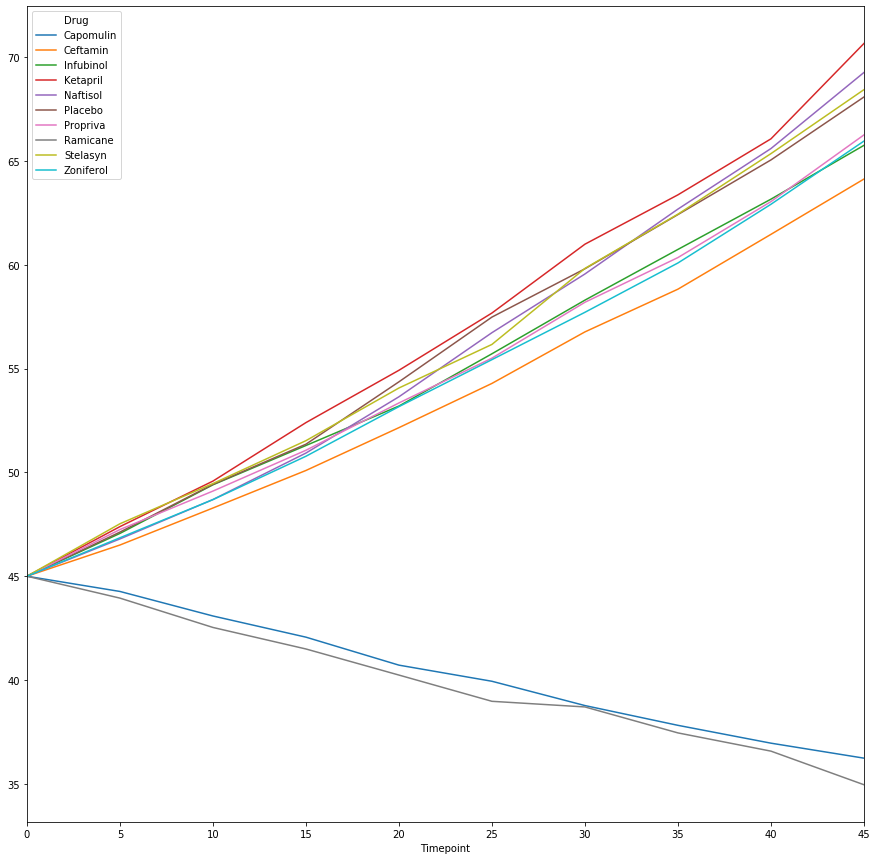

In [56]:
# Generate the Plot (with Error Bars)
# https://stackoverflow.com/questions/52035184/pandas-plot-line-graph-with-both-error-bars-and-markers
# learn how to plot from stackoverflow examples above 
# pull columns that 
reformat_data.plot(figsize=(15,15), yerr = errors, legend = False)


# Save the Figure



In [52]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)